In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [55]:
#READ THE DATA
data1=pd.read_csv(r'F:\pk\01 Data science\PY_DS\06 MULTIPLE LINEAR REGRESSION\Toyoto_Corrola.csv')

In [56]:
data1.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [57]:
data=data1.drop(['Id'],axis=1)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Price      1436 non-null   int64 
 2   Age_08_04  1436 non-null   int64 
 3   KM         1436 non-null   int64 
 4   HP         1436 non-null   int64 
 5   Doors      1436 non-null   int64 
 6   Cylinders  1436 non-null   int64 
 7   Gears      1436 non-null   int64 
 8   Weight     1436 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 101.1+ KB


In [59]:
data.isna().sum()

Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [60]:
data.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


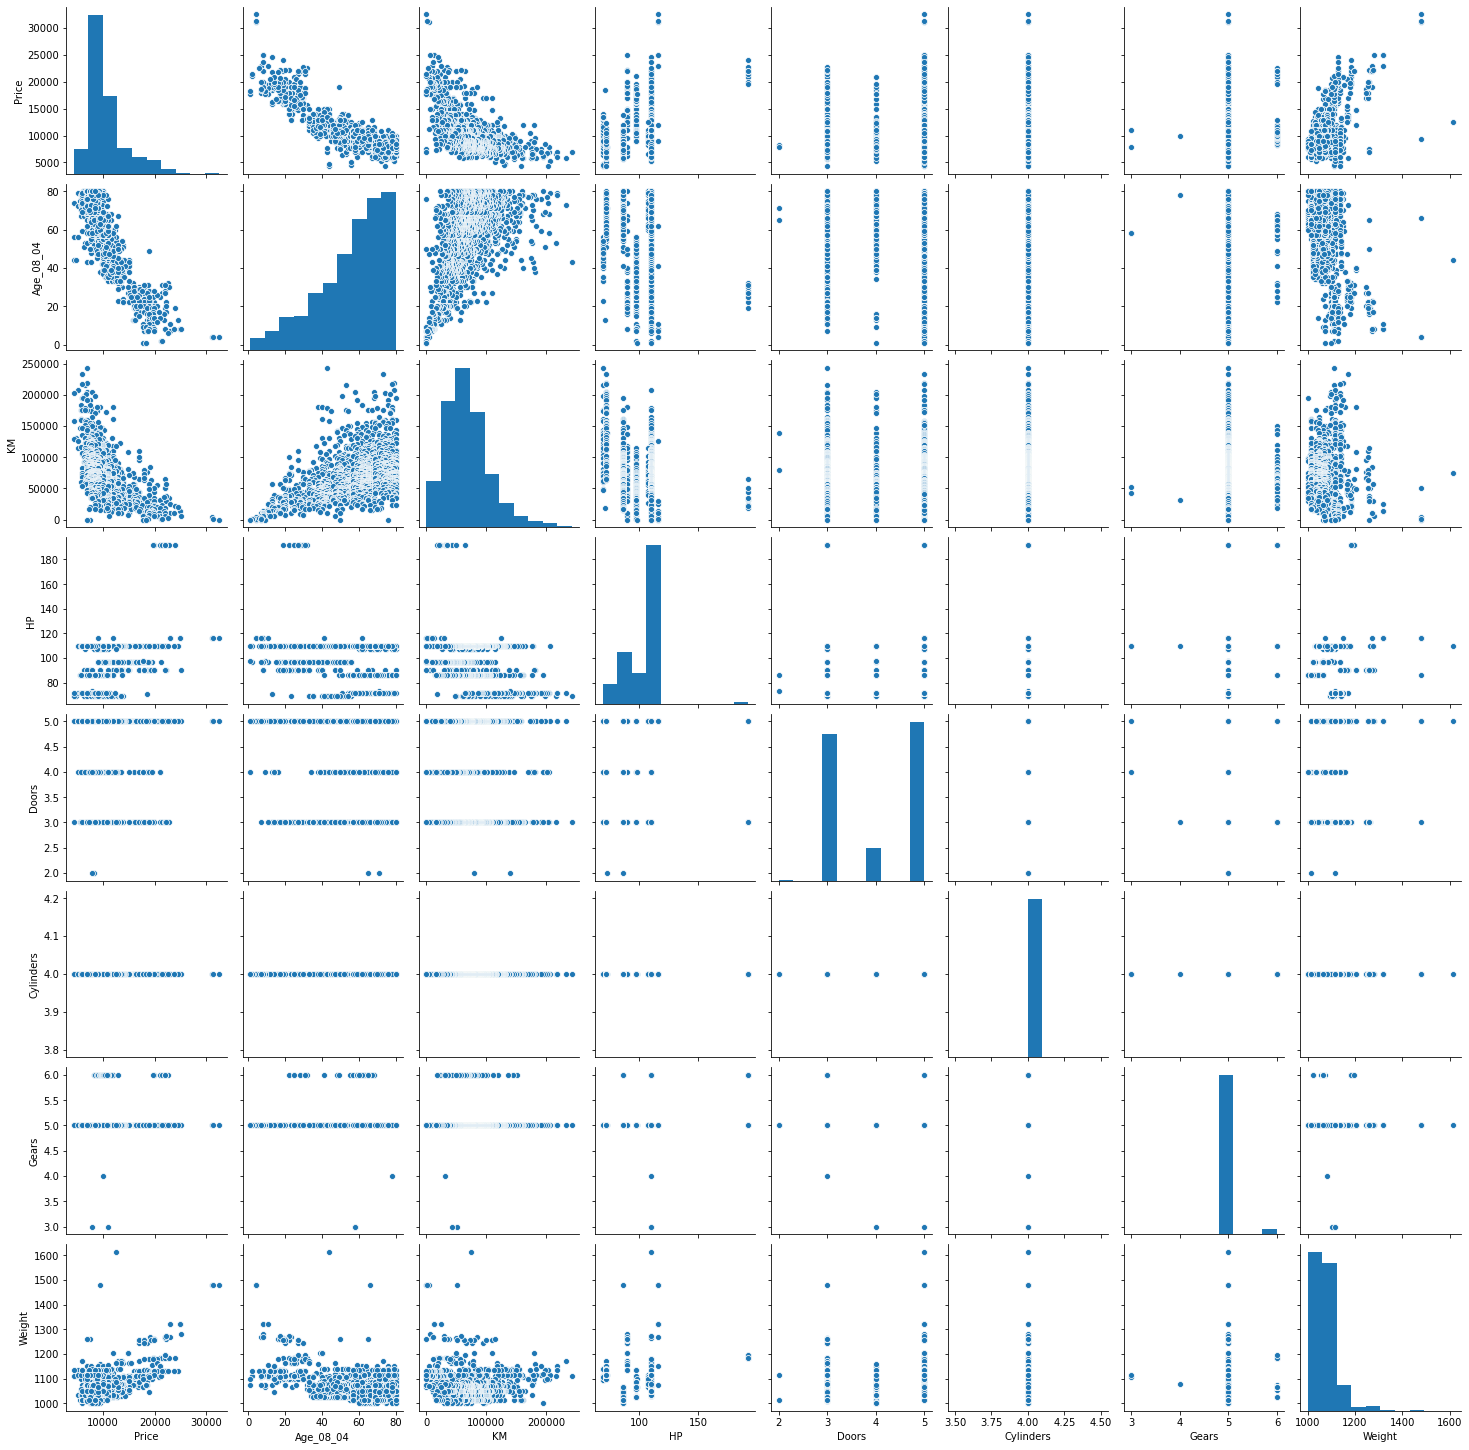

In [61]:
sns.pairplot(data)

In [62]:
data.columns

Index(['Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [63]:
model=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=data).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:40:53   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age_08_04   -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Cylinders  -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     4.86e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [66]:
print(model.tvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64


In [68]:
print(model.pvalues)

Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [69]:
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

In [70]:
ml_v=smf.ols('Price~Doors',data=data).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [71]:
data.columns

Index(['Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [163]:
rsq_Age=smf.ols('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight', data=data).fit().rsquared
vif_Age = 1/(1-rsq_Age)
rsq_KM=smf.ols('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight', data=data).fit().rsquared
vif_KM = 1/(1-rsq_KM)
rsq_HP=smf.ols('HP~Age_08_04+KM+Doors+Cylinders+Gears+Weight', data=data).fit().rsquared
vif_HP = 1/(1-rsq_HP)
rsq_Doors=smf.ols('Doors~Age_08_04+KM+HP+Cylinders+Gears+Weight', data=data).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)
rsq_Cylinders=smf.ols('Cylinders~Age_08_04+KM+HP+Doors+Gears+Weight', data=data).fit().rsquared
vif_Cylinders = 1/(1-rsq_Cylinders)
rsq_Gears=smf.ols('Gears~Age_08_04+KM+HP+Doors+Cylinders+Weight', data=data).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)
rsq_Weight=smf.ols('Weight~Age_08_04+KM+HP+Doors+Cylinders+Gears', data=data).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

C:\Users\PawanK\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [164]:
d1={'Variables':['Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_Doors,vif_Cylinders,vif_Gears,vif_Weight]}

In [165]:
vif_frame=pd.DataFrame(d1)

In [166]:
vif_frame

,Variables,VIF
0,Age_08_04,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


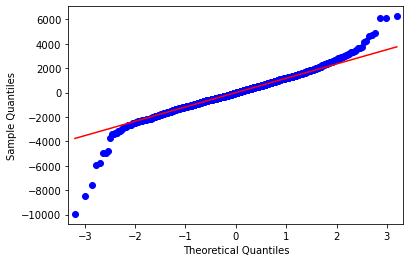

In [167]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [168]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [169]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [170]:
def get_standardize_values(vals):
    return (vals - vals.mean()/vals.std())

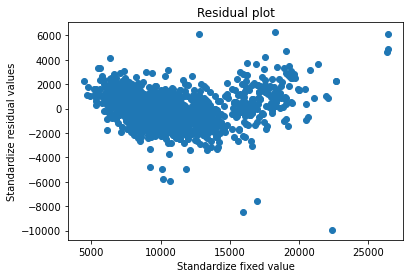

In [171]:
plt.scatter(get_standardize_values(model.fittedvalues),(get_standardize_values(model.resid)))
plt.title('Residual plot')
plt.xlabel('Standardize fixed value')
plt.ylabel('Standardize residual values')
plt.show()

In [172]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [173]:
c

array([4.24724192e-03, 2.47586025e-03, 3.06355853e-03, ...,
       3.95661636e-06, 7.09835015e-04, 1.05319874e-02])

<ipython-input-225-55a902c2ae75>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)), np.round(c,3))


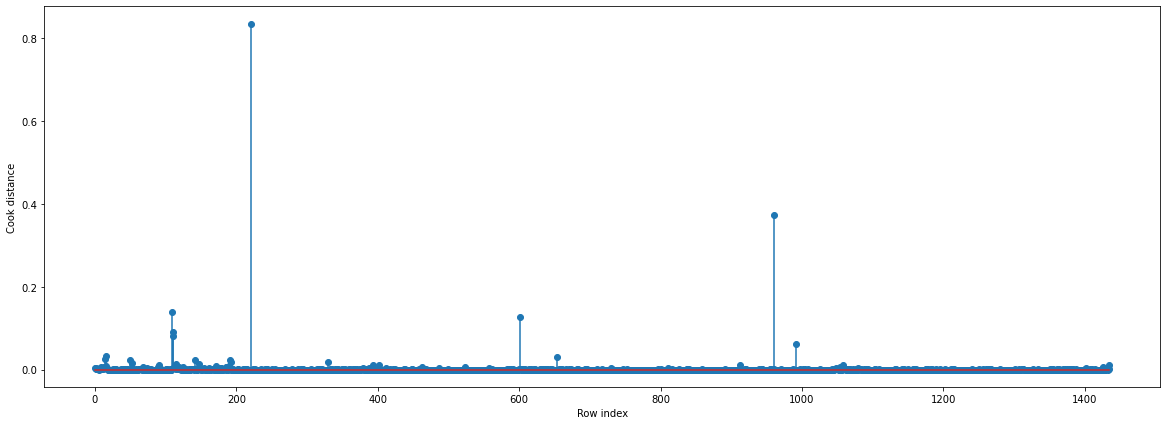

In [225]:
fig=plt.subplots(figsize=(20,7))
                 
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cook distance')
plt.show()

In [226]:
(np.argmax(c),np.max(c))

(221, 0.8359007508853962)

<function matplotlib.pyplot.show(*args, **kw)>

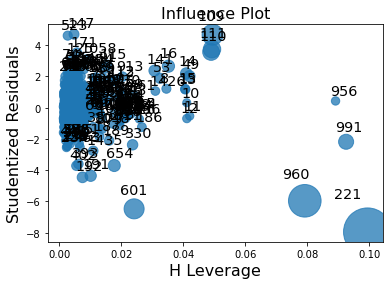

In [227]:
from statsmodels.graphics.regressionplots import  influence_plot
influence_plot(model)
plt.show

In [228]:
k= data.shape[1]
n= data.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [229]:
leverage_cutoff

0.020891364902506964

In [230]:
data[data.index.isin([221,956,991,960])]

,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
956,TOYOTA Corolla 1.6 Linea Luna Aut. 4/5-Doors,10950,58,51421,110,5,4,3,1105
960,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480
991,TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors,7950,58,43000,110,4,4,3,1114


In [205]:
data.head()

,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [210]:
#improvidng the models

In [211]:
data_new=data

In [231]:
data1=data_new.drop(data_new.index[[221]],axis=0).reset_index()

In [233]:
data1=data1.drop(['index'],axis=1)

In [235]:
final_ml_v=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=data1).fit()

In [236]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8685941460420765, 24696.801453325905)

In [239]:
pk=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=data1).fit()

In [240]:
(pk.rsquared,pk.aic)

(0.8685941460420765, 24696.801453325905)

In [241]:
model_influence_v=final_ml_v.get_influence()
(c_v,_)=model_influence_v.cooks_distance

<ipython-input-242-1413c50e393e>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)),np.round(c_v,3));


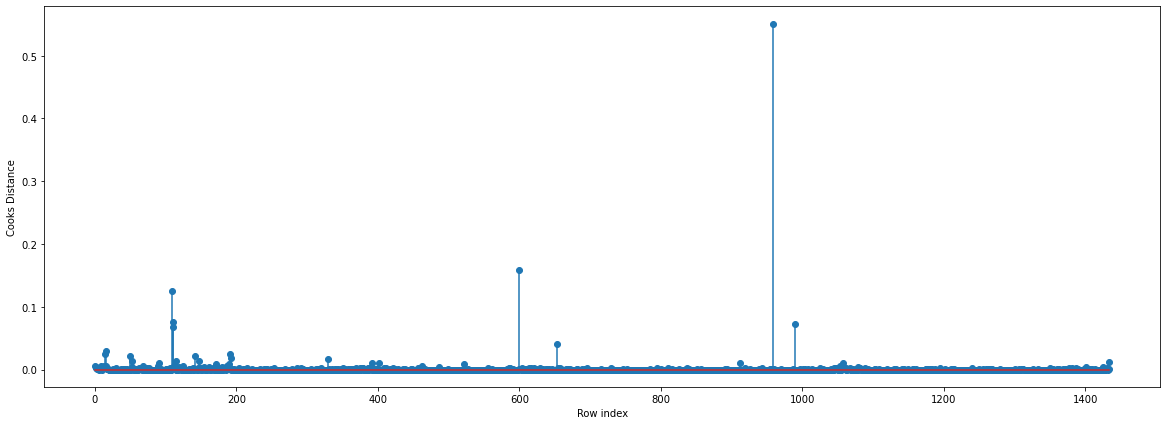

In [242]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [243]:
#index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

(959, 0.5505715012223076)

In [244]:
data2=data1.drop(data1.index[[959]],axis=0).reset_index()

In [247]:
data3=data2.drop(['index'],axis=1)

In [258]:
final_ml_p=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=data3).fit()

In [260]:
(final_ml_p.rsquared,final_ml_v.aic)

(0.8728201848607587, 24696.801453325905)

In [261]:
#Again check for influencers
model_influence_p = final_ml_p.get_influence()
(c_v, _) = model_influence_p.cooks_distance

<ipython-input-262-507c67a56b56>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data3)),np.round(c_v,3));


<function matplotlib.pyplot.show(*args, **kw)>

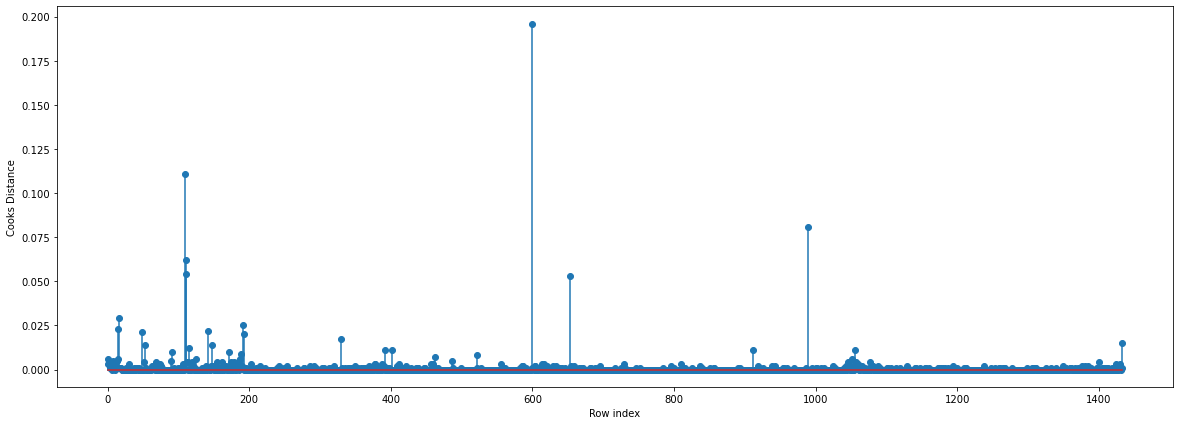

In [262]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show

In [257]:
(np.argmax(c_v),np.max(c_v))

(600, 0.19569782791136425)

In [263]:
data4=data3.drop(data3.index[[600]],axis=0).reset_index()

In [264]:
data4=data4.drop(['index'],axis=1)

In [265]:
final_ml_a=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=data4).fit()

In [267]:
#Again check for influencers
model_influence_a = final_ml_a.get_influence()
(c_v, _) = model_influence_a.cooks_distance

In [269]:
(final_ml_a.rsquared,final_ml_v.aic)

(0.8775378736529914, 24696.801453325905)

<ipython-input-270-87089f34a345>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data4)),np.round(c_v,3));


<function matplotlib.pyplot.show(*args, **kw)>

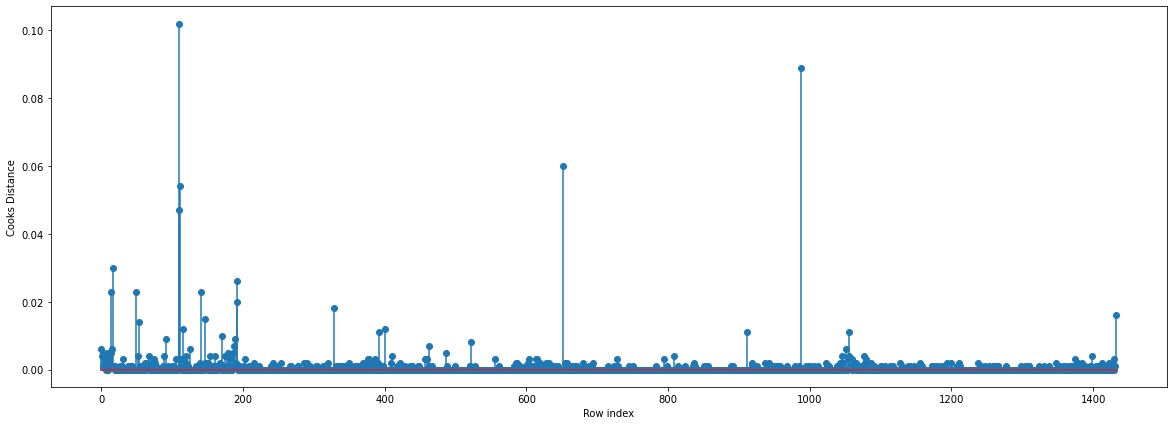

In [270]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show

In [271]:
(np.argmax(c_v),np.max(c_v))

(109, 0.10205872804784413)

In [275]:
data5=data4.drop(data4.index[[109]],axis=0).reset_index()
data5=data5.drop(['index'],axis=1)
final_ml_a=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=data4).fit()

In [276]:
#Again check for influencers
model_influence_a = final_ml_a.get_influence()
(final_ml_a.rsquared,final_ml_v.aic)

(0.8775378736529914, 24696.801453325905)

In [281]:
pred=final_ml_a.predict(data)
price_pred=pd.DataFrame(pred, columns=['Predicted Price']).round()

In [286]:
price_pred

,Predicted Price
0,16933.0
1,16349.0
2,16938.0
3,16568.0
4,16443.0
...,...
1431,8886.0
1432,8344.0
1433,8503.0
1434,8619.0


In [285]:
data[['Price']]

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250
